In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as ttp
import matplotlib.pyplot as plt
import re
import string
from sklearn.metrics import classification_report

In [ ]:
data_true = pd.read_csv("/content/true.csv")
data_fake = pd.read_csv("/content/false.csv")
print(data_fake)

In [ ]:
data_true.head(5)

In [ ]:
data_fake.head(5)
data_true.shape, data_fake.shape

In [ ]:
data_true.shape, data_fake.shape
data_true["class"]=1
data_fake["class"]=0
data_true_manual_testing = data_true.tail(10)
for i in range(24,15,-1):
  data_true.drop([i],axis=0, inplace=True)
data_fake_manual_testing = data_fake.tail(10)
for i in range(24,15,-1):
  data_fake.drop([i],axis=0, inplace=True)

In [ ]:
data_manual_testing = pd.concat([data_fake_manual_testing,data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

In [ ]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

In [ ]:
print(data_merge.groupby(['subject'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['subject'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [ ]:
data = data_merge.drop(["subject","sl no"], axis=1)
data.head(10)

In [ ]:
data=data.sample(frac=1)
data.head(10)

,text,class
4,e,1
3,a,0
1,b,1
7,as,0
15,q,0
5,f,1
11,m,1
6,g,1
13,ad,0
12,kl,0


In [ ]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
def filtering(data):
  text=data.lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub("\\W"," ",text)
  text=re.sub('https?://\s+|www\.S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  return text

In [ ]:
data["text"]= data["text"].apply(filtering)
data.head(10)

In [ ]:
x=data["text"]
y=data["class"]

In [ ]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vector = TfidfVectorizer()
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy = LR.score(xv_test,y_test).round(2)
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test)
print(classification_report(y_test,pred_LR))

[[1 3]
 [1 3]]


<Axes: >

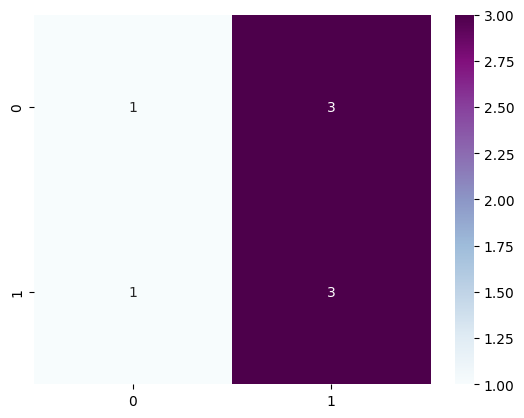

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)
DT.score(xv_test,y_test).round(2)
pred_DT = DT.predict(xv_test)
print(classification_report(y_test,pred_DT))

In [ ]:
cm= confusion_matrix(y_test,pred_DT)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="PiYG",annot=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)
RFC.score(xv_test,y_test)
pred_RFC = RFC.predict(xv_test)
print(classification_report(y_test,pred_RFC))


              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.50      0.75      0.60         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8



[[1 3]
 [1 3]]


<Axes: >

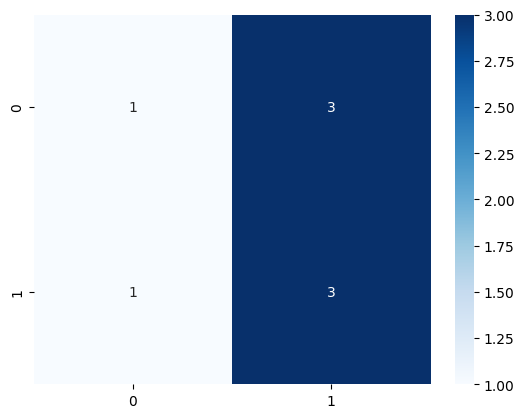

In [ ]:
cm= confusion_matrix(y_test,pred_RFC)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)

In [ ]:
def output_lable(n):
  if n == 0:
    return "FAKE News"
  elif n == 1:
    return "TRUE News"
def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(filtering)
  new_x_test = new_def_test["text"]
  new_xv_test = vector.transform(new_x_test)
  pred_LR = LR.predict(new_xv_test)
  pred_DT = DT.predict(new_xv_test)
  pred_RFC = RFC.predict(new_xv_test)
  return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]),output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)


tel


LR Prediction: TRUE News 
DT Prediction: TRUE News 
RFC Prediction:TRUE News
